# 初始化

In [0]:
#@markdown - **挂载** 
from google.colab import drive
drive.mount('GoogleDrive')

In [0]:
# #@markdown - **卸载**
# !fusermount -u GoogleDrive

# 代码区

In [0]:
#@title 监督下降法 { display-mode: "both" }
# Supervised Descent Method
# 该程序简单的实现了 SDM 算法对数据的拟合
# 拟合函数为多项式函数
#@markdown [Supervised Descent Method and Its Applications to Face Alignment](https://www.cv-foundation.org/openaccess/content_cvpr_2013/papers/Xiong_Supervised_Descent_Method_2013_CVPR_paper.pdf)
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


In [0]:
#@markdown - **样本数据的预处理**
data = np.array([[-2.95507616, 10.94533252],
				[-0.44226119, 2.96705822],
				[-2.13294087, 6.57336839],
				[1.84990823, 5.44244467],
				[0.35139795, 2.83533936],
				[-1.77443098, 5.6800407],
				[-1.8657203, 6.34470814],
				[1.61526823, 4.77833358],
				[-2.38043687, 8.51887713],
				[-1.40513866, 4.18262786]])
x = data[:, 0]
y = data[:, 1]
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)
degree = 8    # 最高多项式阶数
num = 30    # 重构函数时的预测数据个数
theta = np.mat(np.ones((degree+1, 1)))
poly = PolynomialFeatures(degree, include_bias=False)
X_polyfeatures = poly.fit_transform(X)
X_with_x0 = np.c_[np.ones((X.shape[0],1)), X_polyfeatures]

In [0]:
#@markdown - **通过岭回归得到最优参数**
lamb_ridge = 0.1
first_half = np.linalg.inv((np.dot(X_with_x0.T,X_with_x0) + lamb_ridge*np.eye(degree+1)))
sec_half = np.dot(X_with_x0.T, Y)
theta_pre = np.dot(first_half, sec_half)

In [4]:
#@markdown - **参数设定**
R = []  # 每次迭代的参数
n = 3
y0 = Y
theta_start = 0.1 * np.random.randn(degree+1, 1) # 初始参数
theta_start


array([[-0.02291124],
       [-0.02214861],
       [-0.02930746],
       [-0.00191858],
       [-0.05243366],
       [ 0.00756577],
       [-0.11337291],
       [-0.01467263],
       [ 0.04002507]])

In [5]:
#@markdown - **迭代至收敛**
for j in range(3):
    dx = theta_pre - theta_start
    dy = y0 - np.dot(X_with_x0, theta_start)
    # 岭回归
    first_h = np.linalg.inv(np.dot(dy, dy.T) + 1. * np.eye(10))
    sec_h = np.dot(dy, dx.T)
    r_tmp =  np.dot(first_h, sec_h)
    theta_start = theta_start + np.dot(r_tmp.T, dy)
    R.append(r_tmp)
    print(np.linalg.norm(dx))    # 求误差，所有元素平方和开根
print('--------------------')
x_pre = np.linspace(x.min(), x.max(), num)    # 在训练数据给出的范围生成更多用于预测的数据
X_pre = x_pre.reshape(-1, 1)
X_pre_polyfeatures = poly.fit_transform(X_pre)
X_pre_with_x0 = np.c_[np.ones((X_pre.shape[0],1)), X_pre_polyfeatures]
y_pre = np.dot(X_pre_with_x0, theta_start)    # 对更多数据的预测y_pre

2.7594893441976307
9.486114722082387e-05
6.038125072325686e-05
--------------------


In [6]:
#@markdown - **SDM 算法找到的最优参数**
theta_start

array([[ 2.66870469],
       [-0.06198103],
       [ 0.4569818 ],
       [-0.18775581],
       [ 0.20858249],
       [ 0.13368923],
       [-0.00840657],
       [-0.02439164],
       [-0.004972  ]])

In [7]:
#@markdown - **岭回归的最优参数**
theta_pre

array([[ 2.66874218],
       [-0.06198158],
       [ 0.45698858],
       [-0.1877584 ],
       [ 0.20858613],
       [ 0.13369099],
       [-0.0084051 ],
       [-0.02439177],
       [-0.00497262]])

In [8]:
#@markdown - **最后一次的步长**
np.dot(r_tmp.T, dy)

array([[ 2.14067686e-05],
       [-3.16792390e-07],
       [ 3.86752121e-06],
       [-1.47798748e-06],
       [ 2.07589509e-06],
       [ 1.00307615e-06],
       [ 8.34810914e-07],
       [-7.72965247e-08],
       [-3.57867478e-07]])

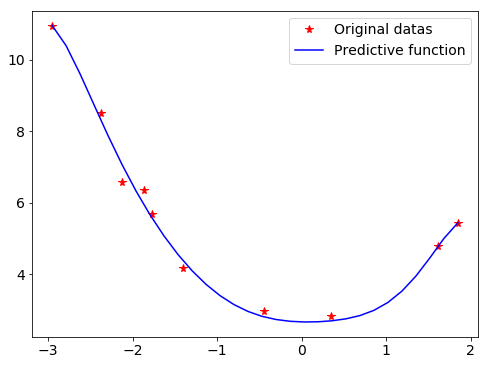

In [9]:
#@markdown - **显示拟合曲线**
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x,y,'*r', markersize=8, label='Original datas')
ax.plot(X_pre_with_x0[:,1], y_pre, 'b', label='Predictive function')
ax.legend(loc='upper right', fontsize=14)
ax.tick_params(labelsize=14)
plt.show()